In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_excel('/scratch/abhishek.f/TF_env/Glioma_Project_Predictve/CRC_EVs_ZP_150724.xlsx', sheet_name = 'Cell_1_hPSC EVs')

In [3]:
df2 = pd.read_excel('/scratch/abhishek.f/TF_env/Glioma_Project_Predictve/CRC_EVs_ZP_150724.xlsx', sheet_name = 'Cell_2_Caco2 EVs')

In [4]:
df3 = pd.read_excel('/scratch/abhishek.f/TF_env/Glioma_Project_Predictve/CRC_EVs_ZP_150724.xlsx', sheet_name = 'Cell_3_DLD-1 EVs')

In [5]:
df1 = df1.iloc[1:]
df2 = df2.iloc[1:]
df3 = df3.iloc[1:]

In [6]:
columns = ['Record', 'Type', 'Measurement Date and Time', 'T',
       'Surface Zeta Potential', 'Surface Zeta Potential Uncertainty','Mob',
        'Tracer Zeta Potential']

In [7]:
df1.drop(columns = columns, inplace = True)
df2.drop(columns = columns, inplace = True)
df3.drop(columns = columns, inplace = True)

In [8]:
def redefine_sample_name(sample):
    if 'hPSC_EV' in sample:
        return 0
    else:
        return 1

In [9]:
dataset1 = pd.concat([df1, df2], axis = 0)
dataset2 = pd.concat([df1, df3], axis = 0)

In [10]:
dataset1['Sample Name'] = dataset1['Sample Name'].apply(redefine_sample_name)
dataset2['Sample Name'] = dataset2['Sample Name'].apply(redefine_sample_name)

In [11]:
columns = ['Zeta Potential', 'Cond', 'Mean Count Rate']

In [12]:
dataset1[columns] = dataset1[columns].astype(float)
dataset2[columns] = dataset2[columns].astype(float)

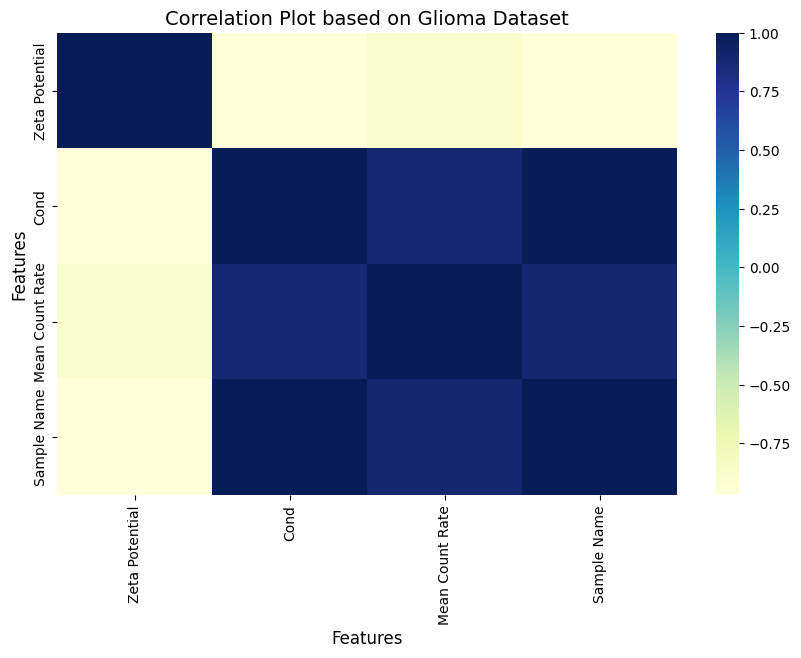

In [13]:
#========================Creating correlation matrix for the Glioma datastet==================================
columns = ['Zeta Potential', 'Cond', 'Mean Count Rate', 'Sample Name']

correlation_matrix = dataset1[columns].corr()
# Create a correlation plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(correlation_matrix, cmap='YlGnBu')
# Add plot title and adjust font size
plt.title('Correlation Plot based on Glioma Dataset', fontsize=14)
# Set the font size of the axis labels
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# Show the plot
plt.show()
#==========================================================================================================

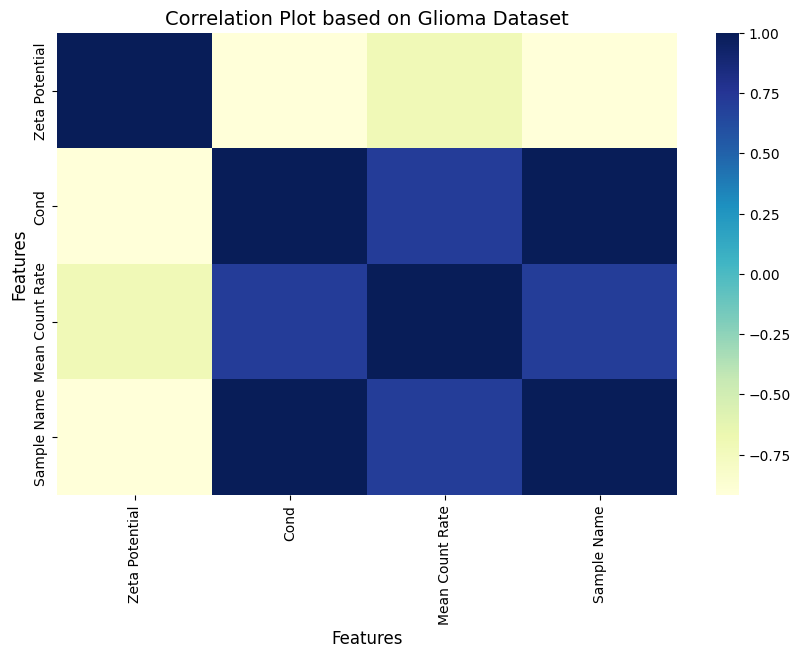

In [14]:
#========================Creating correlation matrix for the Glioma datastet==================================
columns = ['Zeta Potential', 'Cond', 'Mean Count Rate', 'Sample Name']

correlation_matrix = dataset2[columns].corr()
# Create a correlation plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(correlation_matrix, cmap='YlGnBu')
# Add plot title and adjust font size
plt.title('Correlation Plot based on Glioma Dataset', fontsize=14)
# Set the font size of the axis labels
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# Show the plot
plt.show()
#==========================================================================================================

In [15]:
train_set = [0.70, 0.50, 0.1, 0.01, 0.005]

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import time
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc
from scipy.stats import norm
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [17]:
#==================Predictor Variables=====================================
X = dataset1[['Zeta Potential', 'Cond', 'Mean Count Rate']]
#X = dataset.drop(['Grade','Age_in_years'], axis = 1)
#===================Output Variable========================================
Y = dataset1['Sample Name']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [18]:
#=====================Logistic Regression Model with different training sets================
clf_LR = LogisticRegression(solver='lbfgs', max_iter=1000)

for elm in train_set:
    #X_t = X_train[:elm]
    #y_t = y_train[:elm]
    X_t, dummy_x, y_t, dummy_y = train_test_split(X_train, y_train, train_size=elm, random_state=42)
    #Start time
    start_time = time.time()
    # Fitting the classifier to the training data
    clf_LR.fit(X_t, y_t)
    #End Time
    end_time = time.time()
    # Making predictions on the testing data
    y_pred_LR = clf_LR.predict(X_test)
    # Evaluating the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred_LR)
    # Calculate the execution time
    execution_time = end_time - start_time
    print(f'Accuracy score(Logistic Regression Model): {accuracy} with {elm*100}% training records')
    print(f'Execution Time (Logistic Regression model) with {elm*100}% training records is {execution_time} seconds \n')

Accuracy score(Logistic Regression Model): 1.0 with 70.0% training records
Execution Time (Logistic Regression model) with 70.0% training records is 0.029261350631713867 seconds 

Accuracy score(Logistic Regression Model): 1.0 with 50.0% training records
Execution Time (Logistic Regression model) with 50.0% training records is 0.021811485290527344 seconds 

Accuracy score(Logistic Regression Model): 0.9966666666666667 with 10.0% training records
Execution Time (Logistic Regression model) with 10.0% training records is 0.011068105697631836 seconds 

Accuracy score(Logistic Regression Model): 0.9833333333333333 with 1.0% training records
Execution Time (Logistic Regression model) with 1.0% training records is 0.013577699661254883 seconds 

Accuracy score(Logistic Regression Model): 0.9833333333333333 with 0.5% training records
Execution Time (Logistic Regression model) with 0.5% training records is 0.013285398483276367 seconds 



In [19]:
#=====================Random Forest Model with different training sets=====================
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators = 300, max_depth = 10,  min_samples_split = 10)
for elm in train_set:
    X_t, dummy_x, y_t, dummy_y = train_test_split(X_train, y_train, train_size=elm, random_state=42)
    #Start time
    start_time = time.time()
    # Fitting the classifier to the training data
    clf_RF.fit(X_t, y_t)
    #End Time
    end_time = time.time()
    # Making predictions on the testing data
    y_pred_RF = clf_RF.predict(X_test)
    #Evaluating the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred_RF)
    # Calculate the execution time
    execution_time = end_time - start_time
    print(f'Accuracy score(Random Forest Model): {accuracy} with {elm*100}% training records')
    print(f'Execution Time (Random Forest model) with {elm*100}% training records is {execution_time} seconds \n')
#=======================================================================================================

Accuracy score(Random Forest Model): 1.0 with 70.0% training records
Execution Time (Random Forest model) with 70.0% training records is 0.42283105850219727 seconds 

Accuracy score(Random Forest Model): 1.0 with 50.0% training records
Execution Time (Random Forest model) with 50.0% training records is 0.38847923278808594 seconds 

Accuracy score(Random Forest Model): 1.0 with 10.0% training records
Execution Time (Random Forest model) with 10.0% training records is 0.3557772636413574 seconds 

Accuracy score(Random Forest Model): 0.5 with 1.0% training records
Execution Time (Random Forest model) with 1.0% training records is 0.3477630615234375 seconds 

Accuracy score(Random Forest Model): 0.5 with 0.5% training records
Execution Time (Random Forest model) with 0.5% training records is 0.34685301780700684 seconds 



In [20]:
#=====================Support Vector Machine Model with different training sets================
from sklearn.svm import SVC
clf_SVM = SVC(kernel='sigmoid', probability=True, C = 1, gamma='auto')
for elm in train_set:
    X_t, dummy_x, y_t, dummy_y = train_test_split(X_train, y_train, train_size=elm, random_state=42)
    #Start time
    start_time = time.time()
    # Fitting the classifier to the training data
    clf_SVM.fit(X_t, y_t)
    #End Time
    end_time = time.time()
    # Making predictions on the testing data
    y_pred_SVM = clf_SVM.predict(X_test)
    # Evaluating the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred_SVM)
    # Calculate the execution time
    execution_time = end_time - start_time
    print(f'Accuracy score(Support Vector Machine Model): {accuracy} with {elm*100}% training records')
    print(f'Execution Time (Support Vector Machine Model) with {elm*100}% training records is {execution_time} seconds \n')
#==================================================================================================

Accuracy score(Support Vector Machine Model): 0.5 with 70.0% training records
Execution Time (Support Vector Machine Model) with 70.0% training records is 0.087646484375 seconds 

Accuracy score(Support Vector Machine Model): 0.19 with 50.0% training records
Execution Time (Support Vector Machine Model) with 50.0% training records is 0.03511166572570801 seconds 

Accuracy score(Support Vector Machine Model): 0.2833333333333333 with 10.0% training records
Execution Time (Support Vector Machine Model) with 10.0% training records is 0.0038907527923583984 seconds 

Accuracy score(Support Vector Machine Model): 0.5 with 1.0% training records
Execution Time (Support Vector Machine Model) with 1.0% training records is 0.0018260478973388672 seconds 

Accuracy score(Support Vector Machine Model): 0.5 with 0.5% training records
Execution Time (Support Vector Machine Model) with 0.5% training records is 0.0017733573913574219 seconds 



In [21]:
from sklearn.preprocessing import MinMaxScaler
from qiskit_algorithms.utils import algorithm_globals
from qiskit.circuit.library import EfficientSU2, ZZFeatureMap
import qiskit_algorithms.optimizers as op
from qiskit.primitives import Sampler
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

In [22]:
algorithm_globals.random_seed = 123
features = MinMaxScaler().fit_transform(X)
labels = Y
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.7, random_state=algorithm_globals.random_seed
)
num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)

In [23]:
ansatz = EfficientSU2(num_qubits=num_features, reps=3)

In [24]:
optimizer = op.COBYLA(maxiter=250)

In [25]:
sampler = Sampler()

In [26]:
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    loss = 'squared_error',
    optimizer=optimizer
)
#clear objective value history
objective_func_vals = []
pred_vqtask1 = []
for elm in train_set:
    X_t, dummy_x, y_t, dummy_y = train_test_split(train_features, train_labels, train_size=elm, random_state=42)
    #Start time
    start_time = time.time()
    vqc.fit(X_t, y_t.values)
    #End Time
    end_time = time.time()
    #accuracy = vqc.score(test_features, test_labels.values)
    pred = vqc.predict(test_features)
    accuracy = accuracy_score(test_labels.values, pred)
    pred_vqtask1.append(pred)
    #Calculate the execution time
    execution_time = end_time - start_time
    print(f'Accuracy score(VQC Model): {accuracy} with {elm*100}% training records')
    print(f'Execution Time (VQC model) with {elm*100}% training records is {execution_time} seconds \n')
#======================================VQC=================================================

Accuracy score(VQC Model): 1.0 with 70.0% training records
Execution Time (VQC model) with 70.0% training records is 530.7291905879974 seconds 

Accuracy score(VQC Model): 1.0 with 50.0% training records
Execution Time (VQC model) with 50.0% training records is 383.01014852523804 seconds 

Accuracy score(VQC Model): 1.0 with 10.0% training records
Execution Time (VQC model) with 10.0% training records is 71.79067158699036 seconds 

Accuracy score(VQC Model): 1.0 with 1.0% training records
Execution Time (VQC model) with 1.0% training records is 7.310208797454834 seconds 

Accuracy score(VQC Model): 0.9933333333333333 with 0.5% training records
Execution Time (VQC model) with 0.5% training records is 3.4595885276794434 seconds 



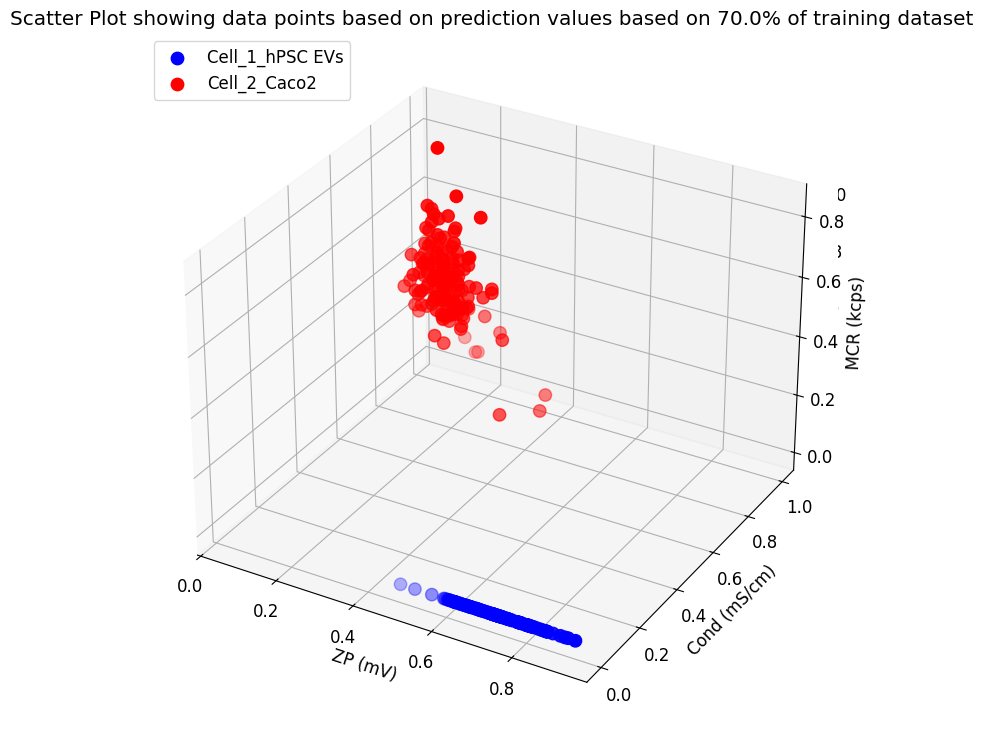

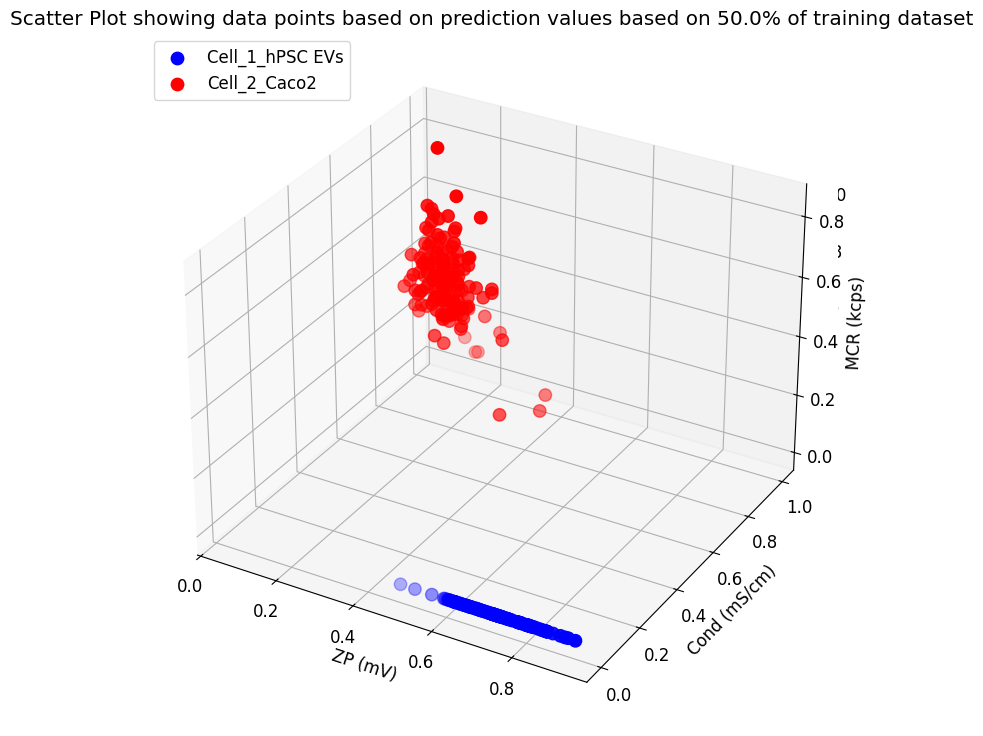

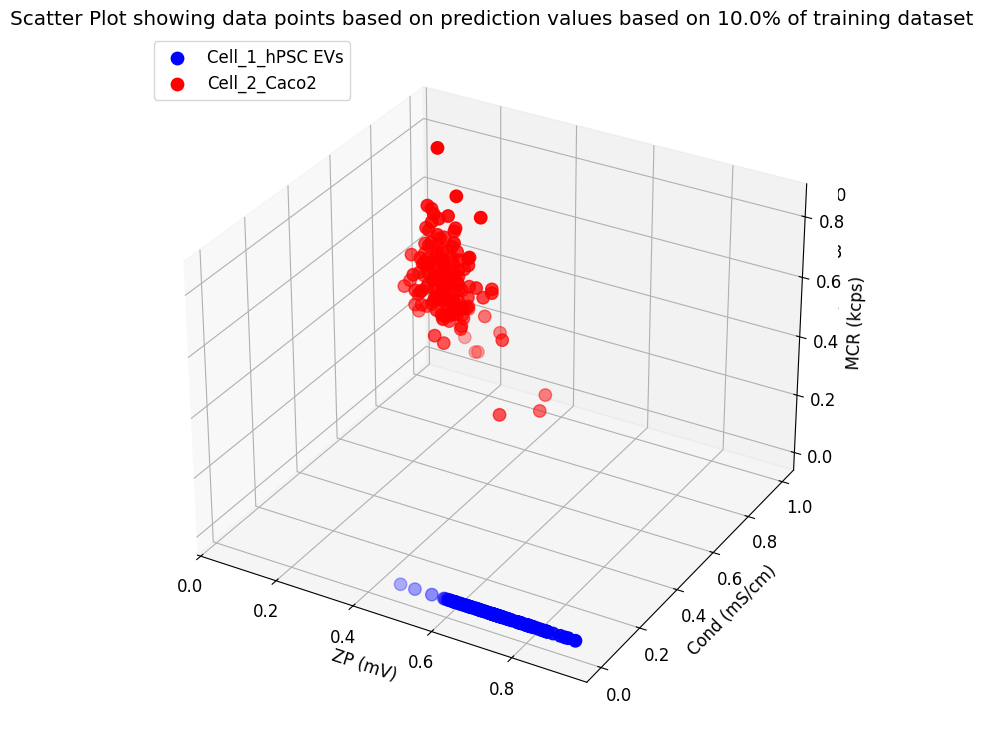

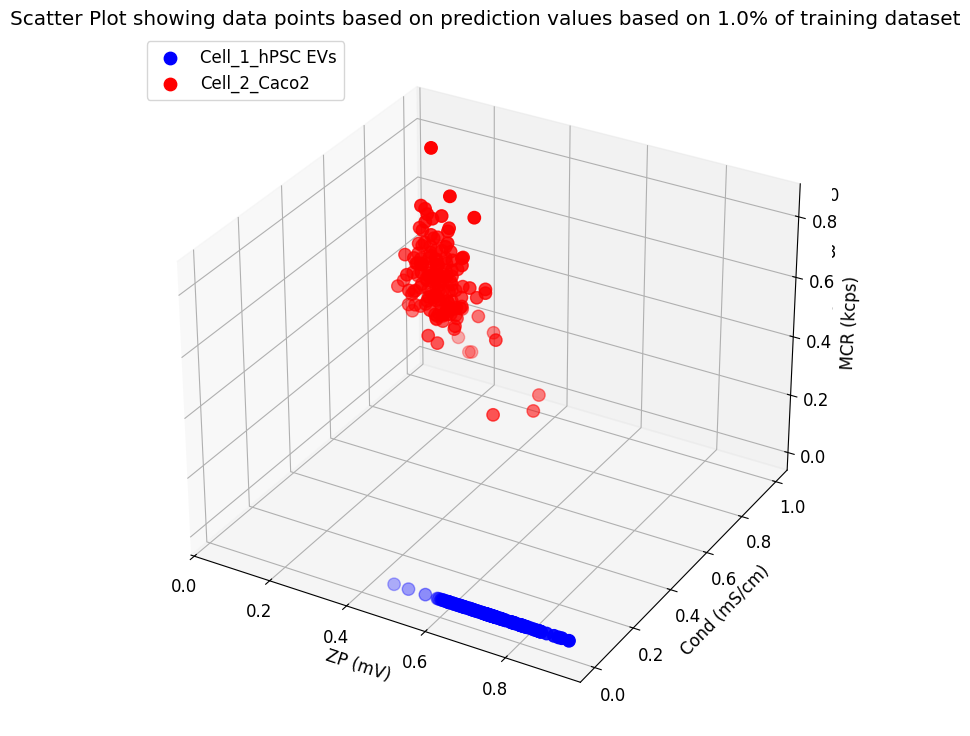

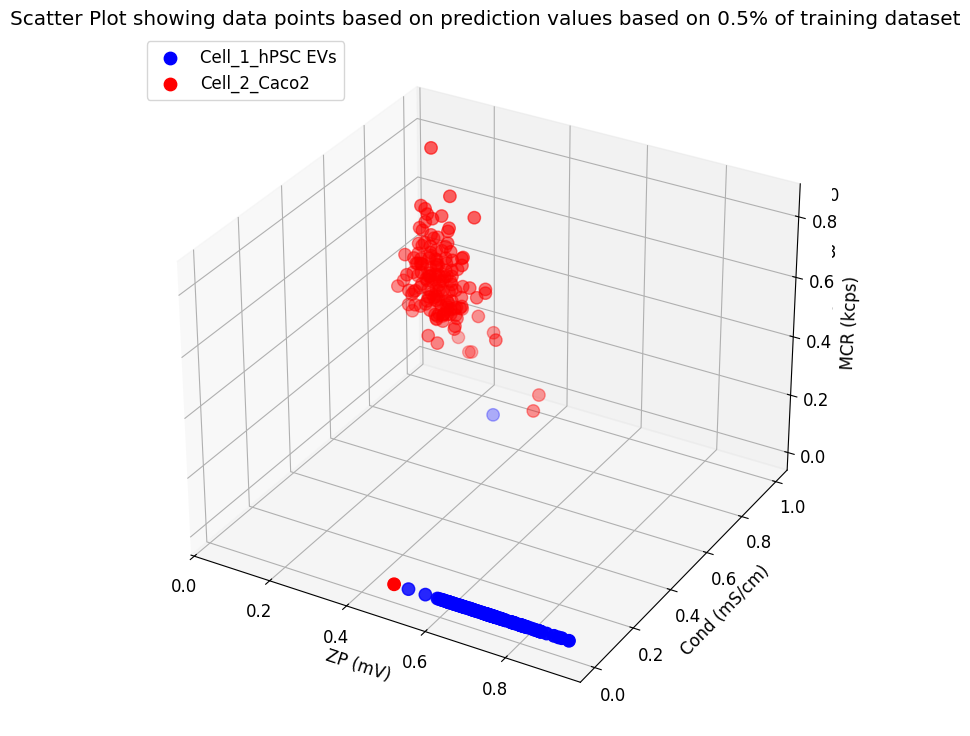

In [27]:
count = 0 
###### 3D Scatter Plot for VQC model based for Task 1
for pred in pred_vqtask1:
    plt.rcParams.update({'font.size': 12})
    fig = plt.figure(figsize=(9,9))
    ax = plt.subplot(1,1,1,projection='3d')
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(test_features[pred==0,0], test_features[pred==0,1], test_features[pred==0,2], c='blue', marker='o', label='Cell_1_hPSC EVs', s=80)
    ax.scatter(test_features[pred==1,0], test_features[pred==1,1], test_features[pred==1,2], c='red', marker='o', label='Cell_2_Caco2',s=80)
    # Set labels for each axis
    ax.set_xlabel('ZP (mV)')
    ax.set_ylabel('Cond (mS/cm)')
    ax.set_zlabel('MCR (kcps)')
    ax.set_title(f'Scatter Plot showing data points based on prediction values based on {train_set[count]*100}% of training dataset')
    count = count + 1
    ax.tick_params("z", which="major",length=15,width = 2.0)
    ax.legend(loc='upper left')
    plt.show()

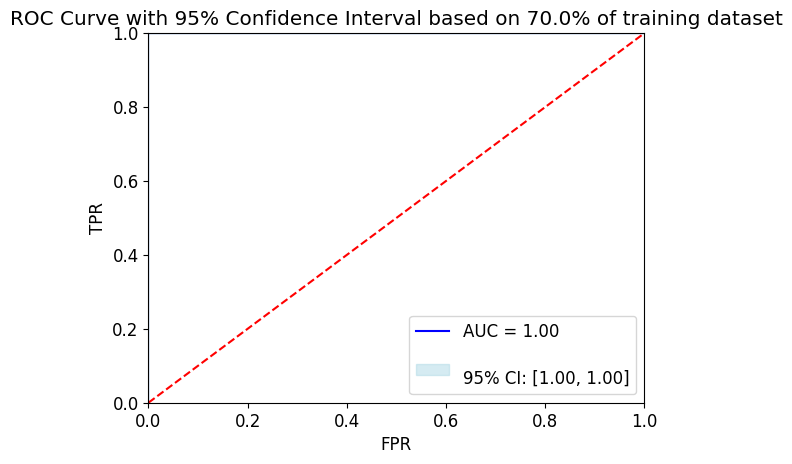

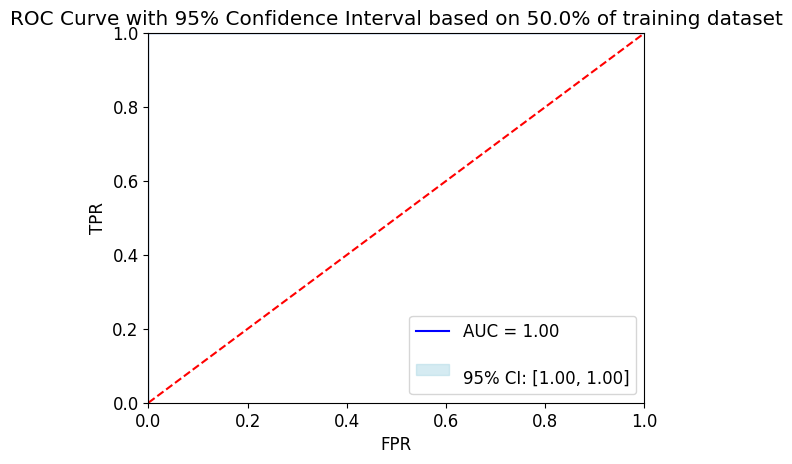

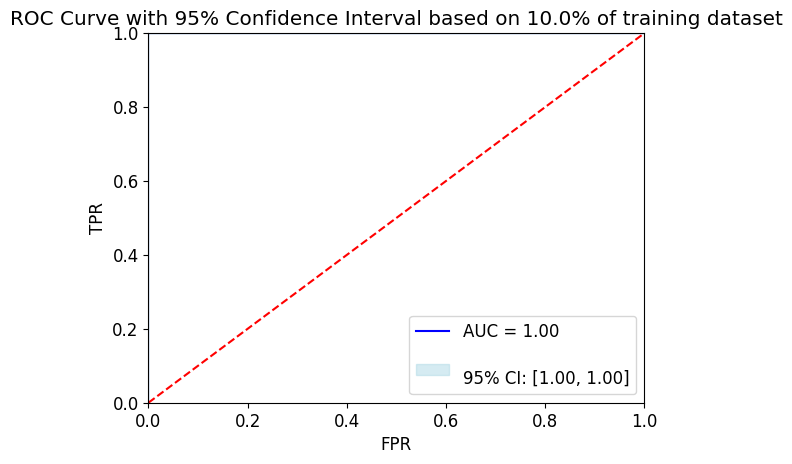

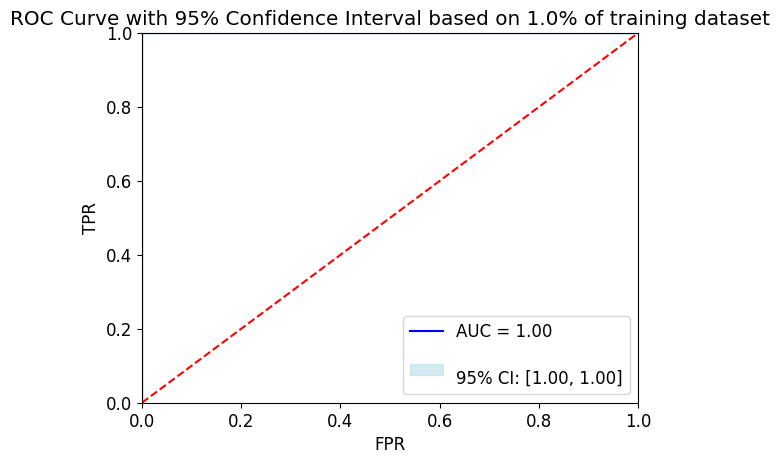

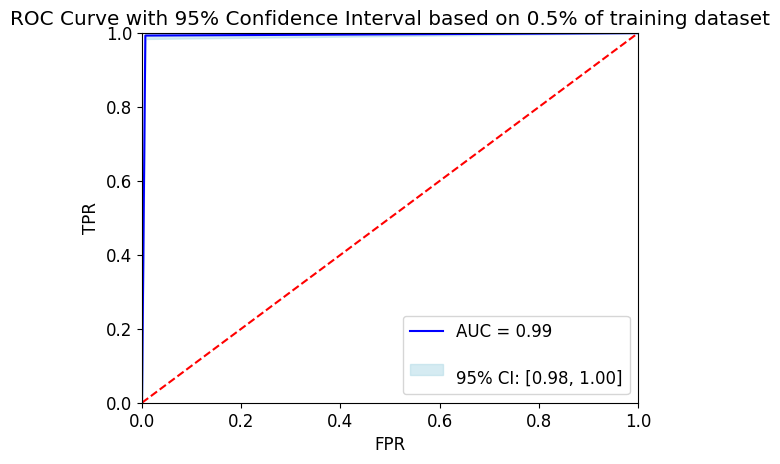

In [28]:
count = 0
for pred in pred_vqtask1:
    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(test_labels, pred)
    roc_auc = auc(fpr, tpr)
    # Compute the confidence interval
    std_err = np.sqrt(np.divide(tpr * (1 - tpr), test_labels.size, where=(test_labels.size != 0)) * (fpr + tpr))
    # Compute the confidence interval with explicit broadcasting
    upper_bound = tpr + std_err * 1.96
    lower_bound = tpr - std_err * 1.96
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='b', label='AUC = %0.2f' % roc_auc)
    plt.fill_between(fpr, lower_bound, upper_bound, color='lightblue', alpha=0.5,label = '\n95%% CI: [%0.2f, %0.2f]' % (lower_bound[1], upper_bound[1]))
    plt.plot([0, 1], [0, 1], color='r', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'ROC Curve with 95% Confidence Interval based on {train_set[count]*100}% of training dataset')
    count = count + 1
    plt.legend(loc="lower right")
    plt.show()

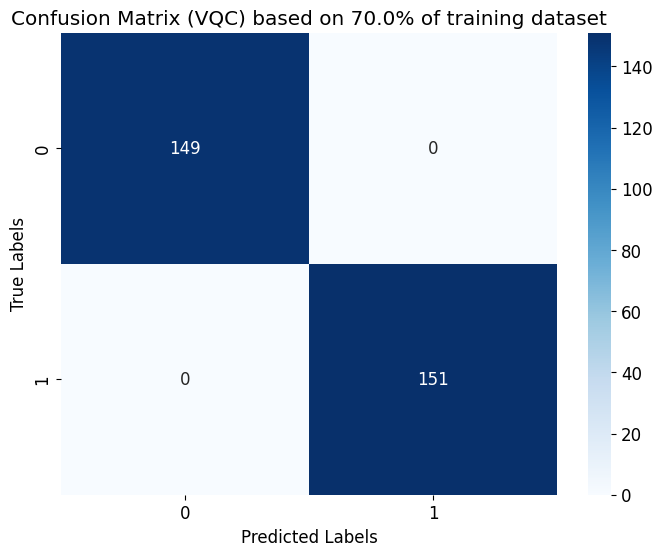

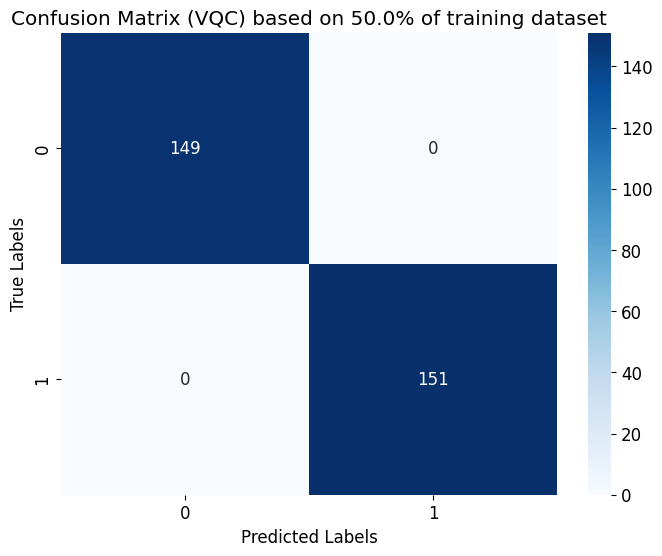

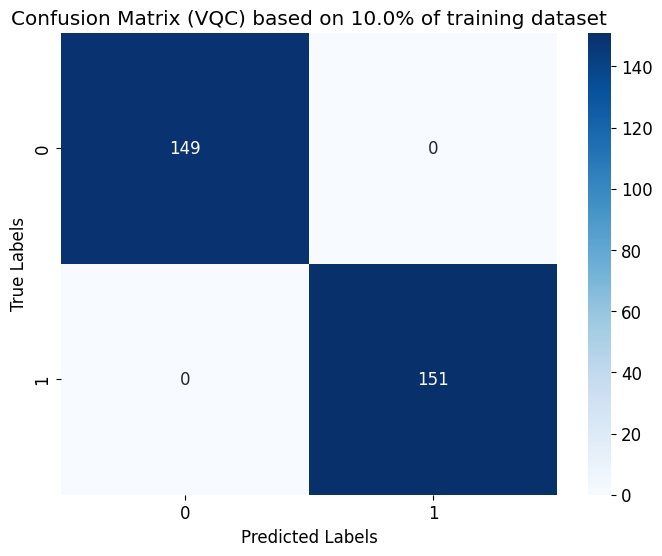

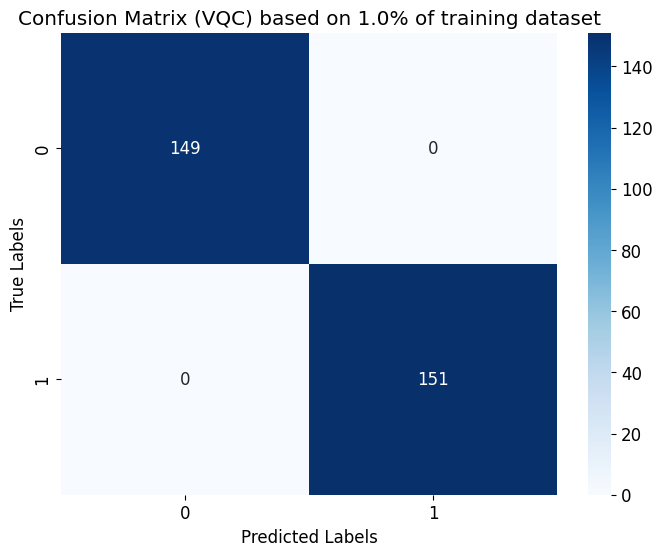

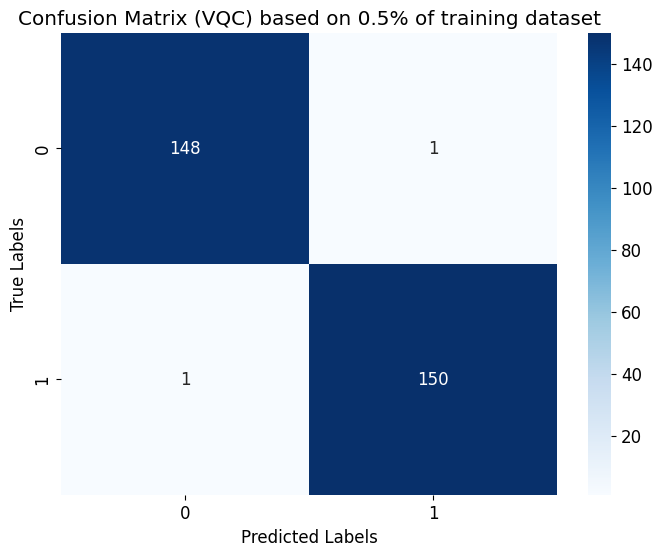

In [29]:
count = 0
for pred in pred_vqtask1:
    # Calculate the confusion matrix
    cm = confusion_matrix(test_labels, pred)
    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix (VQC) based on {train_set[count]*100}% of training dataset')
    count = count + 1
    plt.show()

In [30]:
#==================Predictor Variables=====================================
X2 = dataset2[['Zeta Potential', 'Cond', 'Mean Count Rate']]
#X = dataset.drop(['Grade','Age_in_years'], axis = 1)
#===================Output Variable========================================
Y2 = dataset2['Sample Name']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, Y2, test_size=0.3, random_state=42)

In [31]:
#=====================Logistic Regression Model with different training sets================
clf_LR = LogisticRegression(solver='lbfgs', max_iter=1000)

for elm in train_set:
    #X_t = X_train[:elm]
    #y_t = y_train[:elm]
    X_t, dummy_x, y_t, dummy_y = train_test_split(X_train_2, y_train_2, train_size=elm, random_state=42)
    #Start time
    start_time = time.time()
    # Fitting the classifier to the training data
    clf_LR.fit(X_t, y_t)
    #End Time
    end_time = time.time()
    # Making predictions on the testing data
    y_pred_LR = clf_LR.predict(X_test_2)
    # Evaluating the accuracy of the model
    accuracy = accuracy_score(y_test_2, y_pred_LR)
    # Calculate the execution time
    execution_time = end_time - start_time
    print(f'Accuracy score(Logistic Regression Model): {accuracy} with {elm*100}% training records')
    print(f'Execution Time (Logistic Regression model) with {elm*100}% training records is {execution_time} seconds \n')

Accuracy score(Logistic Regression Model): 1.0 with 70.0% training records
Execution Time (Logistic Regression model) with 70.0% training records is 0.026456832885742188 seconds 

Accuracy score(Logistic Regression Model): 1.0 with 50.0% training records
Execution Time (Logistic Regression model) with 50.0% training records is 0.01869988441467285 seconds 

Accuracy score(Logistic Regression Model): 1.0 with 10.0% training records
Execution Time (Logistic Regression model) with 10.0% training records is 0.0174407958984375 seconds 

Accuracy score(Logistic Regression Model): 0.9566666666666667 with 1.0% training records
Execution Time (Logistic Regression model) with 1.0% training records is 0.014392614364624023 seconds 

Accuracy score(Logistic Regression Model): 0.9566666666666667 with 0.5% training records
Execution Time (Logistic Regression model) with 0.5% training records is 0.012542486190795898 seconds 



In [32]:
#=====================Random Forest Model with different training sets=====================
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators = 300, max_depth = 10,  min_samples_split = 10)
for elm in train_set:
    X_t, dummy_x, y_t, dummy_y = train_test_split(X_train_2, y_train_2, train_size=elm, random_state=42)
    #Start time
    start_time = time.time()
    # Fitting the classifier to the training data
    clf_RF.fit(X_t, y_t)
    #End Time
    end_time = time.time()
    # Making predictions on the testing data
    y_pred_RF = clf_RF.predict(X_test_2)
    #Evaluating the accuracy of the model
    accuracy = accuracy_score(y_test_2, y_pred_RF)
    # Calculate the execution time
    execution_time = end_time - start_time
    print(f'Accuracy score(Random Forest Model): {accuracy} with {elm*100}% training records')
    print(f'Execution Time (Random Forest model) with {elm*100}% training records is {execution_time} seconds \n')
#=======================================================================================================

Accuracy score(Random Forest Model): 1.0 with 70.0% training records
Execution Time (Random Forest model) with 70.0% training records is 0.4335646629333496 seconds 

Accuracy score(Random Forest Model): 1.0 with 50.0% training records
Execution Time (Random Forest model) with 50.0% training records is 0.39461541175842285 seconds 

Accuracy score(Random Forest Model): 1.0 with 10.0% training records
Execution Time (Random Forest model) with 10.0% training records is 0.3505887985229492 seconds 

Accuracy score(Random Forest Model): 0.5 with 1.0% training records
Execution Time (Random Forest model) with 1.0% training records is 0.3497591018676758 seconds 

Accuracy score(Random Forest Model): 0.5 with 0.5% training records
Execution Time (Random Forest model) with 0.5% training records is 0.3499619960784912 seconds 



In [33]:
#=====================Support Vector Machine Model with different training sets================
from sklearn.svm import SVC
clf_SVM = SVC(kernel='sigmoid', probability=True, C = 1000, gamma='auto')
for elm in train_set:
    X_t, dummy_x, y_t, dummy_y = train_test_split(X_train_2, y_train_2, train_size=elm, random_state=42)
    #Start time
    start_time = time.time()
    # Fitting the classifier to the training data
    clf_SVM.fit(X_t, y_t)
    #End Time
    end_time = time.time()
    # Making predictions on the testing data
    y_pred_SVM = clf_SVM.predict(X_test_2)
    # Evaluating the accuracy of the model
    accuracy = accuracy_score(y_test_2, y_pred_SVM)
    # Calculate the execution time
    execution_time = end_time - start_time
    print(f'Accuracy score(Support Vector Machine Model): {accuracy} with {elm*100}% training records')
    print(f'Execution Time (Support Vector Machine Model) with {elm*100}% training records is {execution_time} seconds \n')
#==================================================================================================

Accuracy score(Support Vector Machine Model): 0.5 with 70.0% training records
Execution Time (Support Vector Machine Model) with 70.0% training records is 0.08802628517150879 seconds 

Accuracy score(Support Vector Machine Model): 0.05 with 50.0% training records
Execution Time (Support Vector Machine Model) with 50.0% training records is 0.0338749885559082 seconds 

Accuracy score(Support Vector Machine Model): 0.06333333333333334 with 10.0% training records
Execution Time (Support Vector Machine Model) with 10.0% training records is 0.0033032894134521484 seconds 

Accuracy score(Support Vector Machine Model): 0.5 with 1.0% training records
Execution Time (Support Vector Machine Model) with 1.0% training records is 0.00205230712890625 seconds 

Accuracy score(Support Vector Machine Model): 0.5 with 0.5% training records
Execution Time (Support Vector Machine Model) with 0.5% training records is 0.0019104480743408203 seconds 



In [34]:
#=====================Vector Quantum Classifier Model for dataset 2 with different training sets================
algorithm_globals.random_seed = 123
features = MinMaxScaler().fit_transform(X2)
labels = Y2
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.7, random_state=algorithm_globals.random_seed
)
num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
#feature_map.decompose().draw(output="mpl", fold=20)

In [35]:
ansatz = EfficientSU2(num_qubits=num_features, reps=3)

In [36]:
optimizer = op.COBYLA(maxiter=250)

In [37]:
sampler = Sampler()

In [38]:
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    loss = 'cross_entropy'
)
pred_vqtask2 = []
#clear objective value history
objective_func_vals = []
for elm in train_set:
    X_t, dummy_x, y_t, dummy_y = train_test_split(train_features, train_labels, train_size=elm, random_state=42)
    #Start time
    start_time = time.time()
    vqc.fit(X_t, y_t.values)
    #End Time
    end_time = time.time()
    #accuracy = vqc.score(test_features, test_labels.values)
    pred = vqc.predict(test_features)
    accuracy = accuracy_score(test_labels.values, pred)
    pred_vqtask2.append(pred)
    #Calculate the execution time
    execution_time = end_time - start_time
    print(f'Accuracy score(VQC Model): {accuracy} with {elm*100}% training records')
    print(f'Execution Time (VQC model) with {elm*100}% training records is {execution_time} seconds \n')
#======================================VQC=================================================

Accuracy score(VQC Model): 1.0 with 70.0% training records
Execution Time (VQC model) with 70.0% training records is 536.2075390815735 seconds 

Accuracy score(VQC Model): 1.0 with 50.0% training records
Execution Time (VQC model) with 50.0% training records is 386.0056896209717 seconds 

Accuracy score(VQC Model): 1.0 with 10.0% training records
Execution Time (VQC model) with 10.0% training records is 73.829274892807 seconds 

Accuracy score(VQC Model): 1.0 with 1.0% training records
Execution Time (VQC model) with 1.0% training records is 7.546870708465576 seconds 

Accuracy score(VQC Model): 0.9633333333333334 with 0.5% training records
Execution Time (VQC model) with 0.5% training records is 3.3948848247528076 seconds 



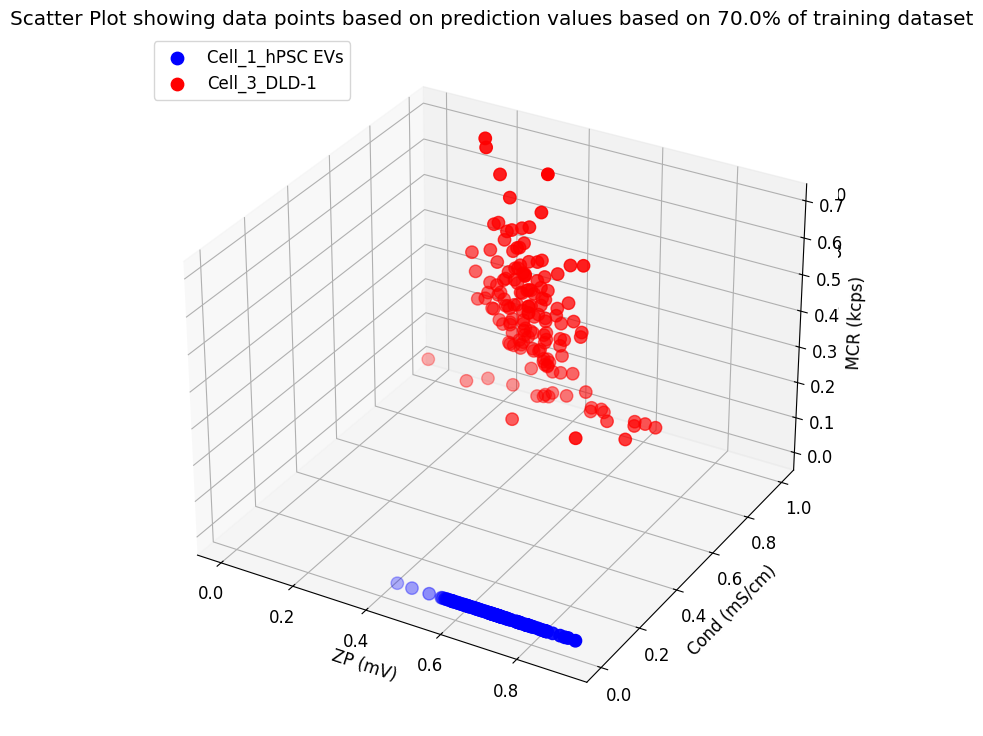

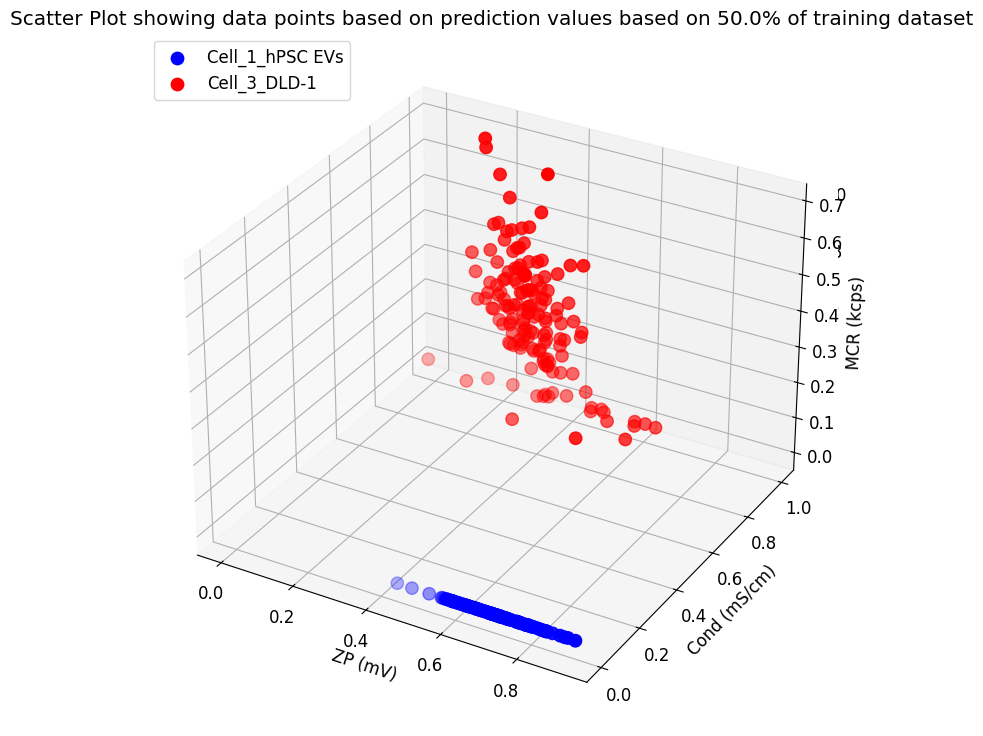

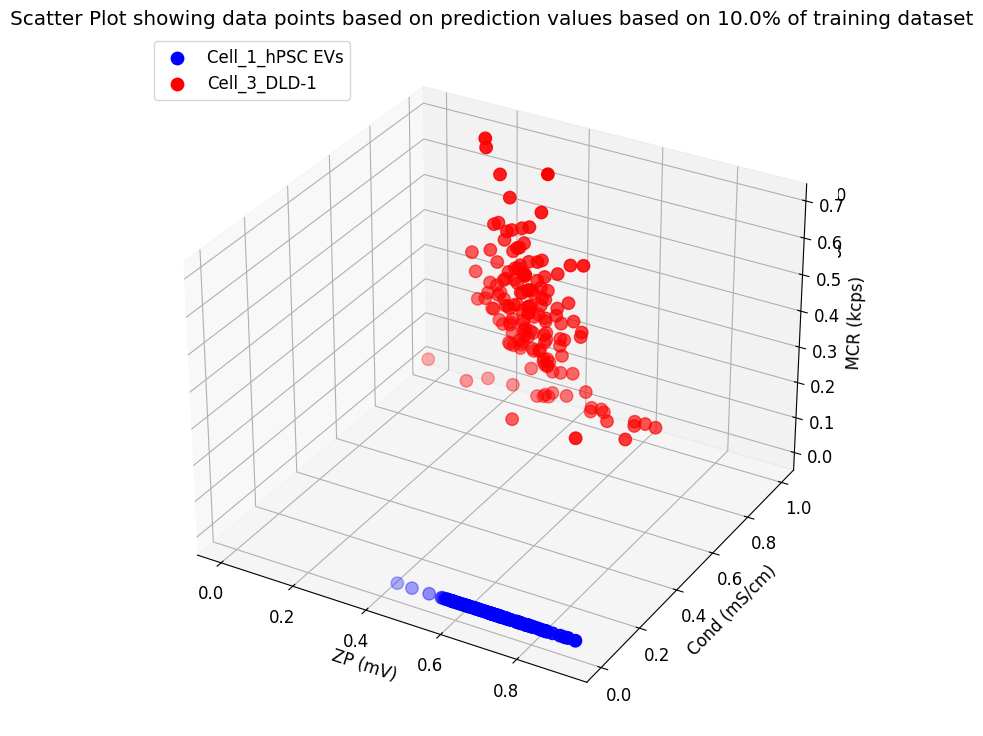

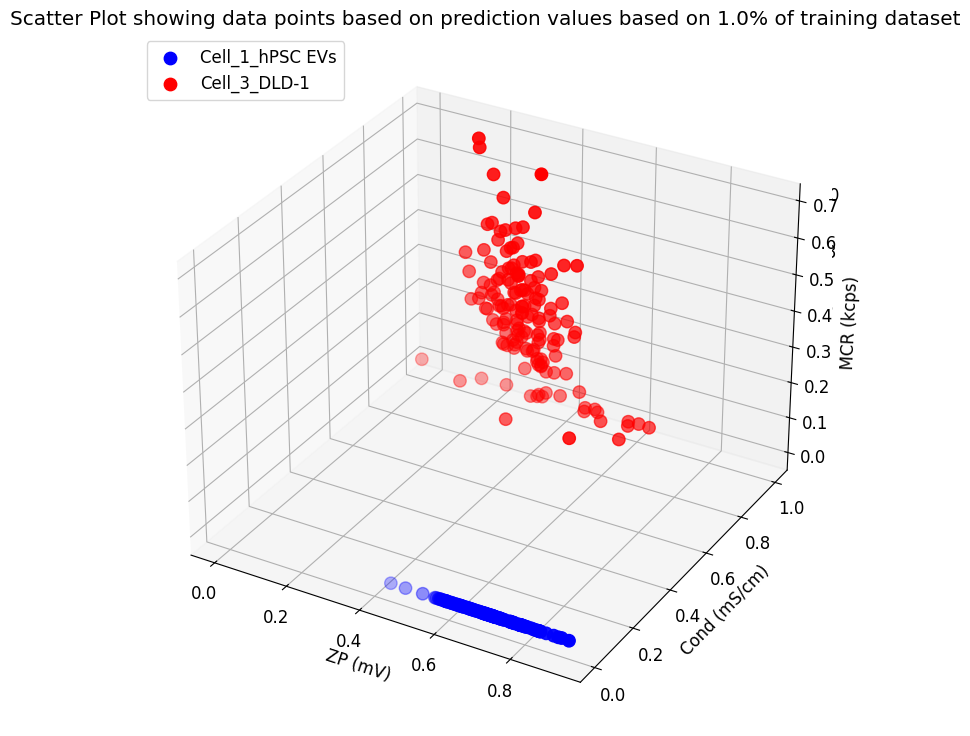

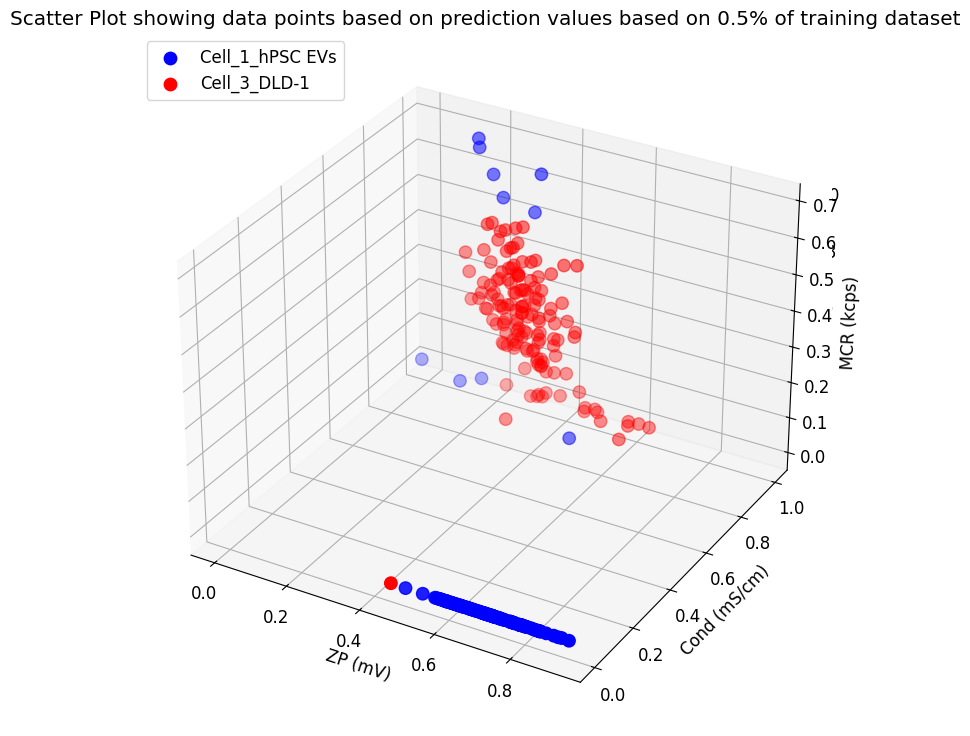

In [39]:
count = 0
###### 3D Scatter Plot for VQC model based for Task 2
for pred in pred_vqtask2:
    plt.rcParams.update({'font.size': 12})
    fig = plt.figure(figsize=(9,9))
    ax = plt.subplot(1,1,1,projection='3d')
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(test_features[pred==0,0], test_features[pred==0,1], test_features[pred==0,2], c='blue', marker='o', label='Cell_1_hPSC EVs', s=80)
    ax.scatter(test_features[pred==1,0], test_features[pred==1,1], test_features[pred==1,2], c='red', marker='o', label='Cell_3_DLD-1',s=80)
    # Set labels for each axis
    ax.set_xlabel('ZP (mV)')
    ax.set_ylabel('Cond (mS/cm)')
    ax.set_zlabel('MCR (kcps)')
    ax.set_title(f'Scatter Plot showing data points based on prediction values based on {train_set[count]*100}% of training dataset')
    count = count + 1
    ax.tick_params("z", which="major",length=15,width = 2.0)
    ax.legend(loc='upper left')
    plt.show()

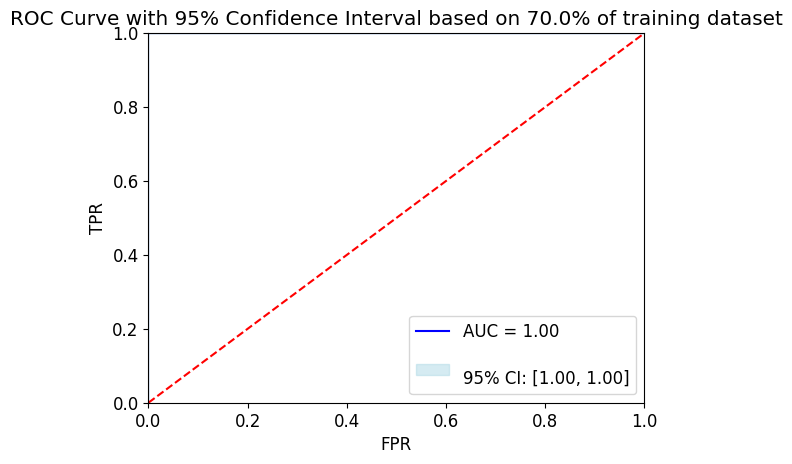

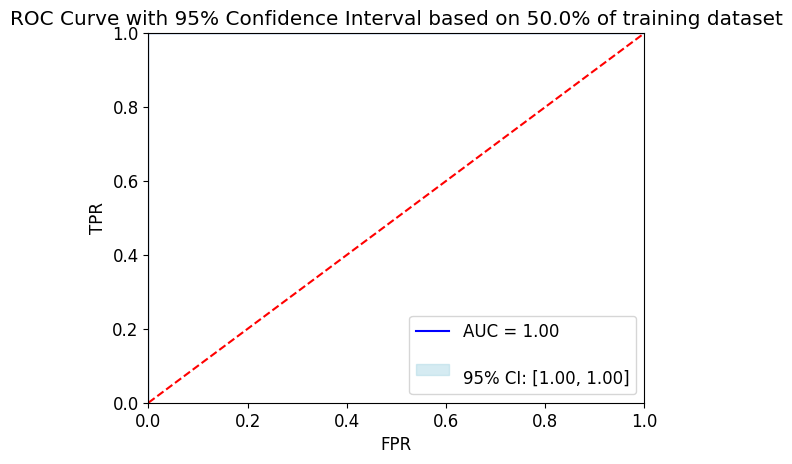

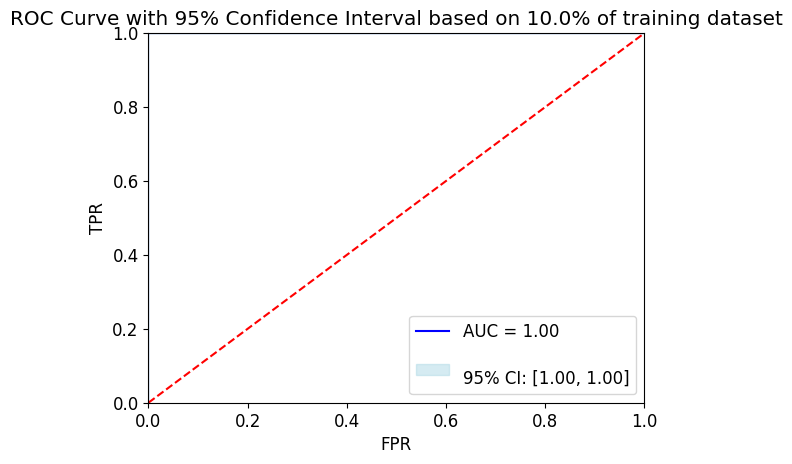

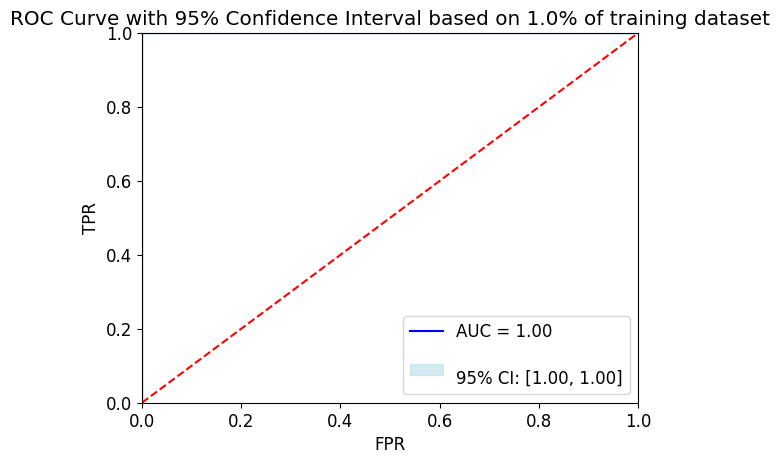

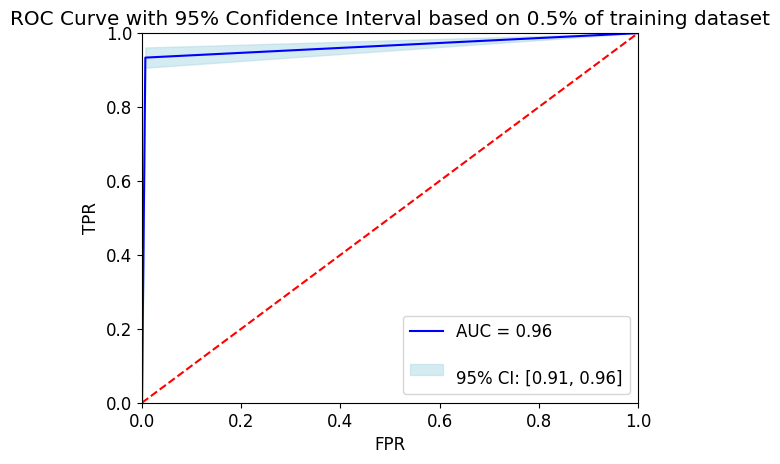

In [40]:
count=0
for pred in pred_vqtask2:
    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(test_labels, pred)
    roc_auc = auc(fpr, tpr)
    # Compute the confidence interval
    std_err = np.sqrt(np.divide(tpr * (1 - tpr), test_labels.size, where=(test_labels.size != 0)) * (fpr + tpr))
    # Compute the confidence interval with explicit broadcasting
    upper_bound = tpr + std_err * 1.96
    lower_bound = tpr - std_err * 1.96
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='b', label='AUC = %0.2f' % roc_auc)
    plt.fill_between(fpr, lower_bound, upper_bound, color='lightblue', alpha=0.5,label = '\n95%% CI: [%0.2f, %0.2f]' % (lower_bound[1], upper_bound[1]))
    plt.plot([0, 1], [0, 1], color='r', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'ROC Curve with 95% Confidence Interval based on {train_set[count]*100}% of training dataset')
    count = count + 1
    plt.legend(loc="lower right")
    plt.show()

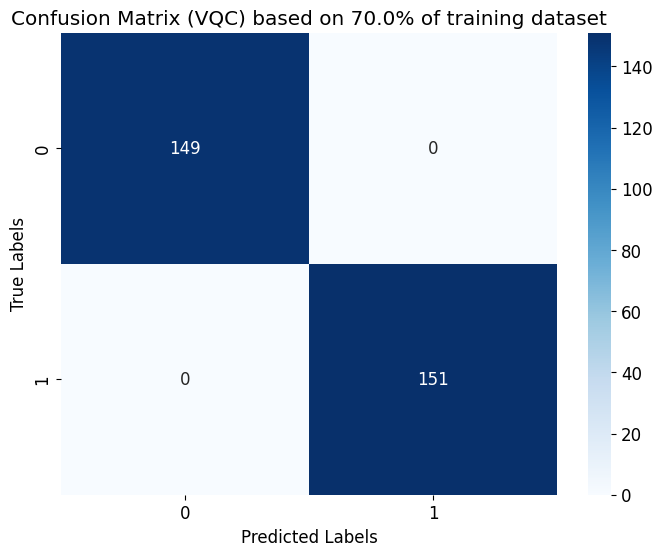

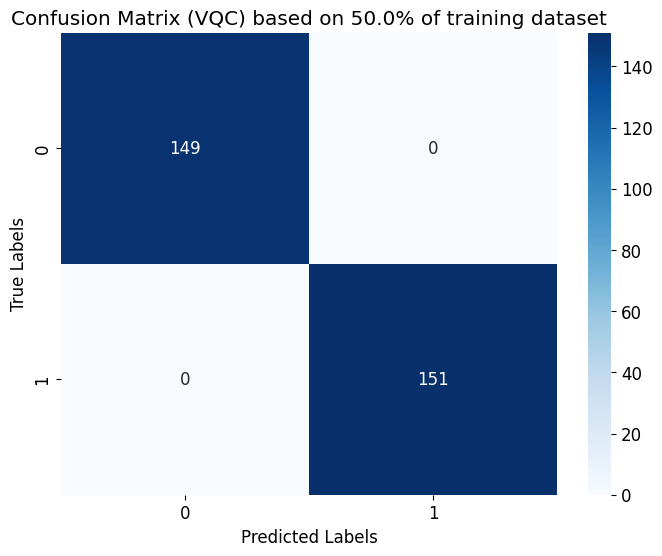

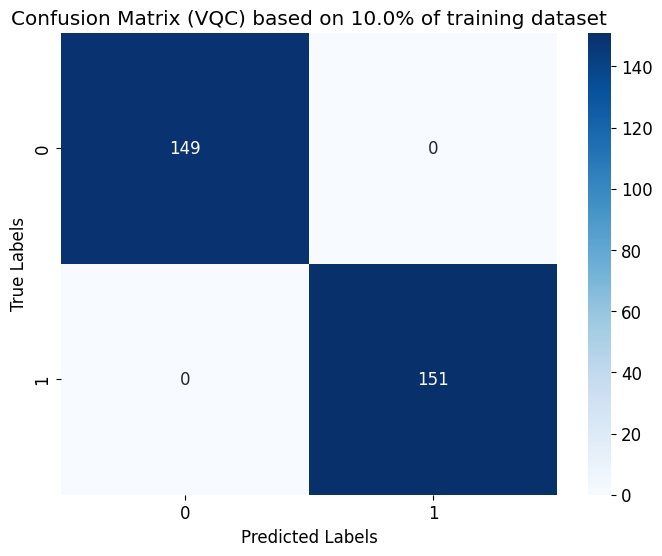

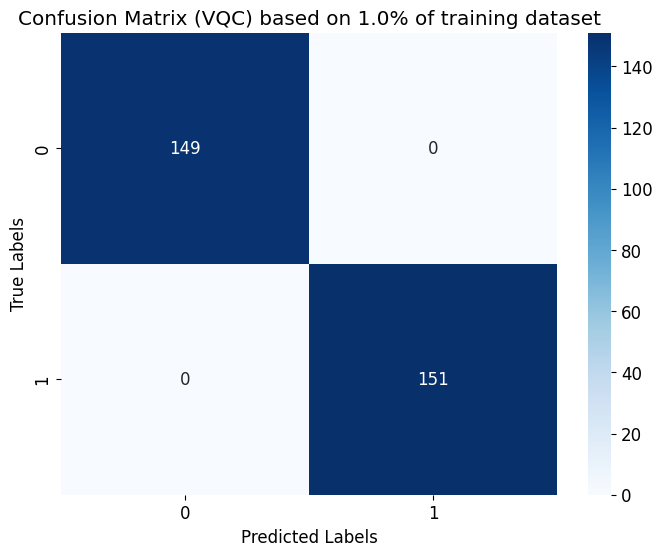

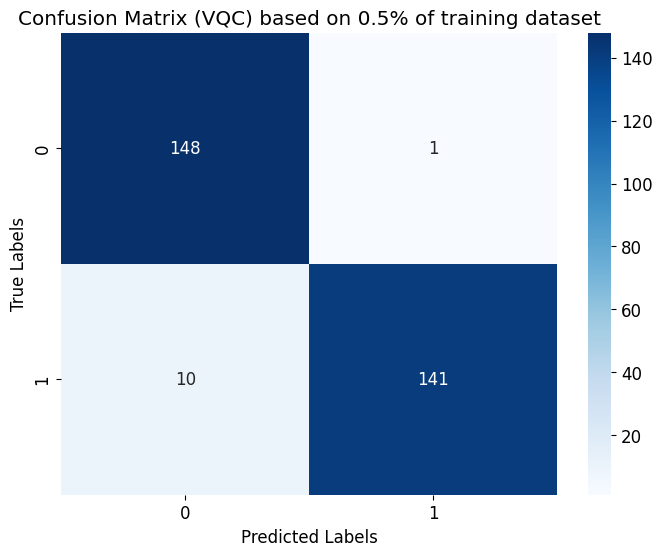

In [41]:
count=0
for pred in pred_vqtask2:
    # Calculate the confusion matrix
    cm = confusion_matrix(test_labels, pred)
    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix (VQC) based on {train_set[count]*100}% of training dataset')
    count = count + 1
    plt.show()